<a href="https://colab.research.google.com/github/Sunny18-2002/IIITH-files/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1)Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


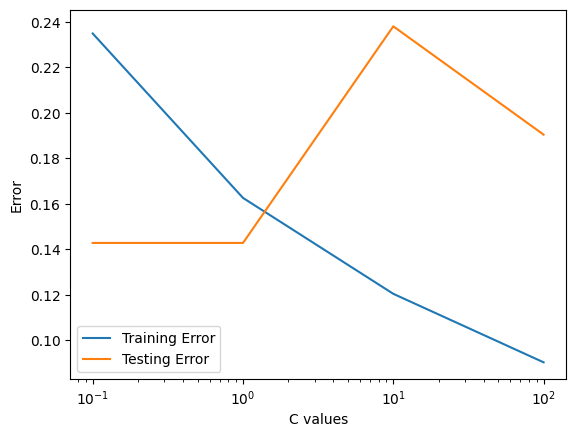

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Sonar dataset
sonar_data = fetch_openml(name='sonar', version=1, as_frame=True)
X = sonar_data['data']
y = sonar_data['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of C values
C_values = [0.1, 1, 10, 100]

# Lists to store training and testing errors for each C value
training_errors = []
testing_errors = []

# Iterate over different C values
for C_value in C_values:
    # Create a Support Vector Machine classifier with a linear kernel
    classifier = SVC(kernel='linear', C=C_value)

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the training set
    y_train_pred = classifier.predict(X_train)

    # Make predictions on the test set
    y_test_pred = classifier.predict(X_test)

    # Calculate training and testing errors
    training_error = 1 - accuracy_score(y_train, y_train_pred)
    testing_error = 1 - accuracy_score(y_test, y_test_pred)

    # Append errors to lists
    training_errors.append(training_error)
    testing_errors.append(testing_error)

# Plot the errors for different C values
plt.plot(C_values, training_errors, label='Training Error')
plt.plot(C_values, testing_errors, label='Testing Error')
plt.xscale('log')  # Use a log scale for better visualization of C values
plt.xlabel('C values')
plt.ylabel('Error')
plt.legend()
plt.show()


# 2)Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Converged after 77 iterations.


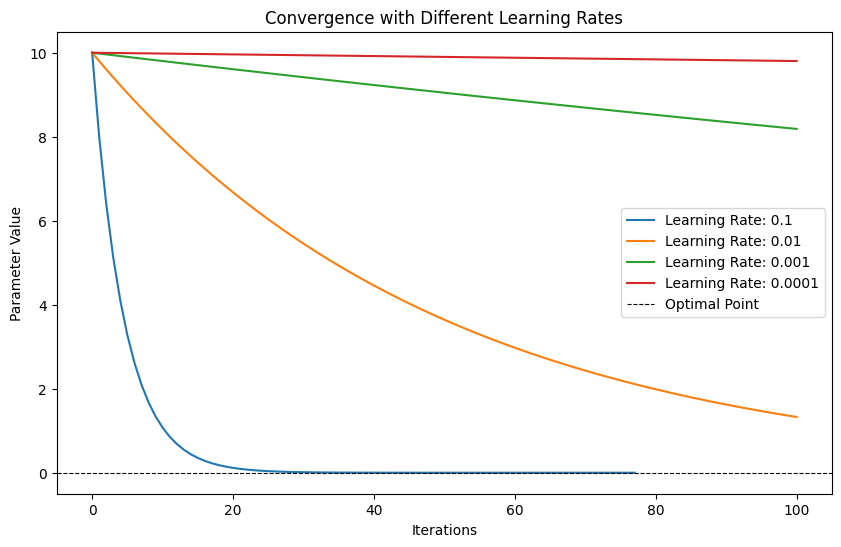

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function (quadratic)
def objective_function(x):
    return x**2

# Gradient descent optimization
def gradient_descent(learning_rate, max_iterations=100, threshold=1e-6):
    x = 10.0  # Initial guess
    history = [x]

    for iteration in range(max_iterations):
        gradient = 2 * x  # Gradient of the quadratic function
        x = x - learning_rate * gradient
        history.append(x)

        # Check for convergence
        if abs(gradient) < threshold:
            print(f"Converged after {iteration + 1} iterations.")
            break

    return np.array(history)

# Experiment with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
iteration_histories = []

for lr in learning_rates:
    iterations = gradient_descent(lr)
    iteration_histories.append(iterations)

# Plot the convergence for different learning rates
plt.figure(figsize=(10, 6))
for lr, iterations in zip(learning_rates, iteration_histories):
    plt.plot(iterations, label=f'Learning Rate: {lr}')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--', label='Optimal Point')
plt.title('Convergence with Different Learning Rates')
plt.xlabel('Iterations')
plt.ylabel('Parameter Value')
plt.legend()
plt.show()


# 3)Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.

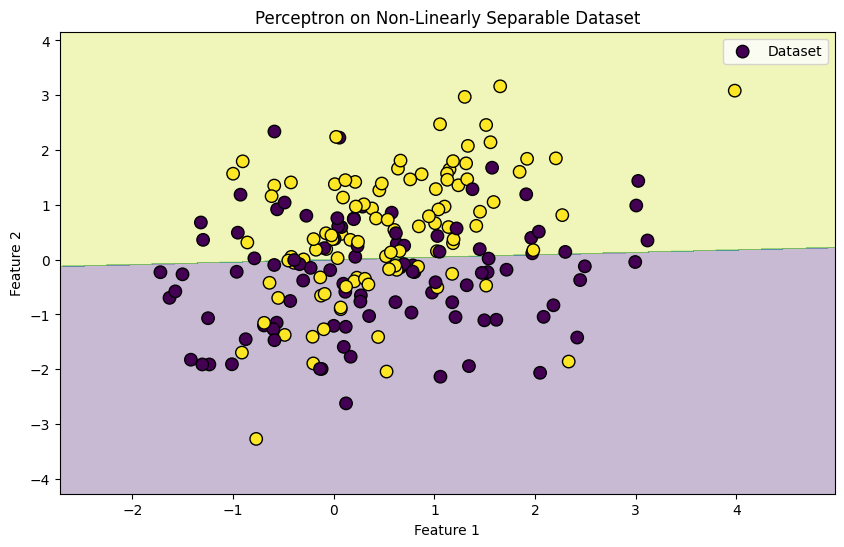

Accuracy on the test set: 0.725


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a toy dataset that is not linearly separable
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the perceptron
perceptron = Perceptron(max_iter=100, random_state=42)
perceptron.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron.predict(X_test)

# Plot the decision boundary and the dataset
plt.figure(figsize=(10, 6))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot of the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=80, label='Dataset')

plt.title('Perceptron on Non-Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Print accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy}')
